Task 4

 Sales and Prediction using Python

In [ ]:
# importing all library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing the dataset

advertising = pd.DataFrame(pd.read_csv("/content/advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


EDA

In [ ]:
advertising.shape

(200, 4)

In [ ]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
advertising.isnull().sum()
#there is no null value

,0
TV,0
Radio,0
Newspaper,0
Sales,0


Distribution of variables

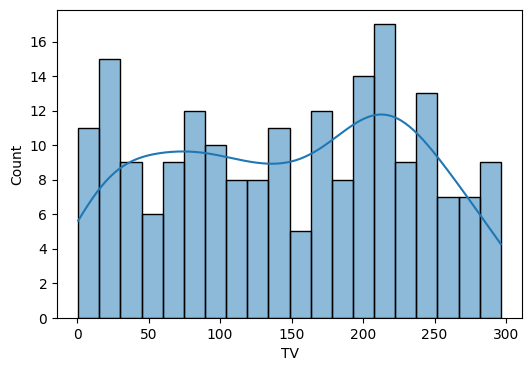

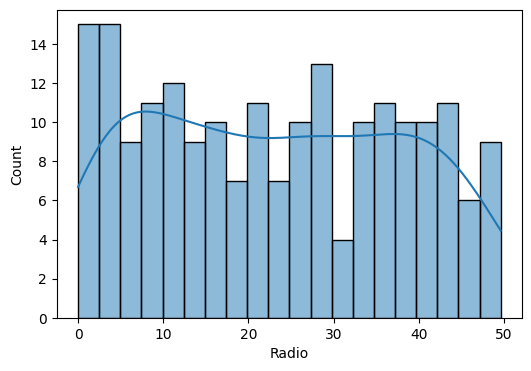

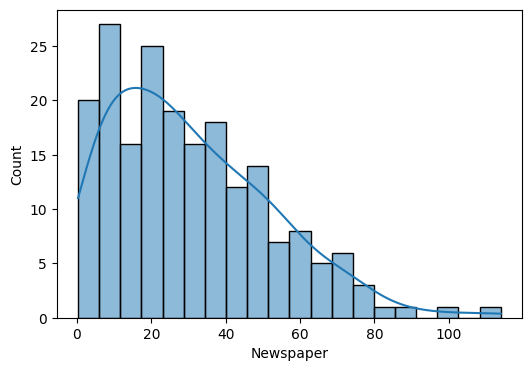

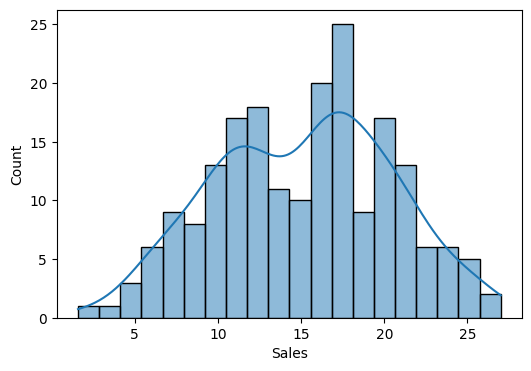

In [ ]:
numeric_columns = ['TV','Radio','Newspaper','Sales']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(advertising[col],kde = True,bins = 20)

Checking of outliers

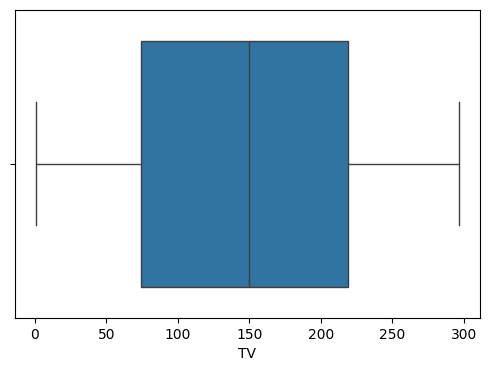

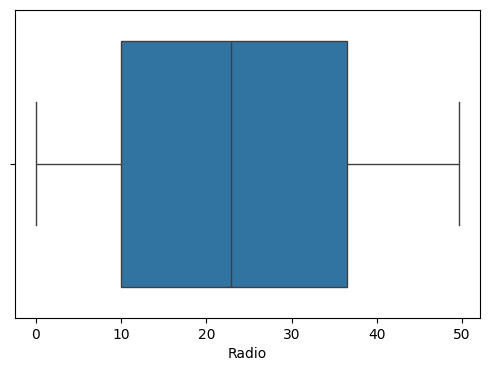

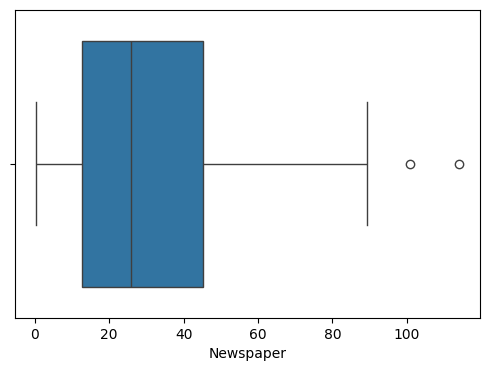

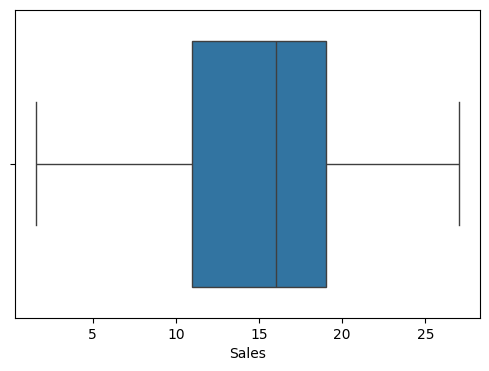

In [ ]:
for col in numeric_columns:
    plt.figure(figsize= (6,4))
    sns.boxplot(x = advertising[col])

Distribution Insights

1.TV and Radio ad spend have a roughly normal distribution.

2.Newspaper ad spend is slightly right-skewed, with a few high outliers.

3.Sales show a mild bell-curve shape but with a long tail on the lower end

Heatmap for checking corelation with the sales

<Axes: >

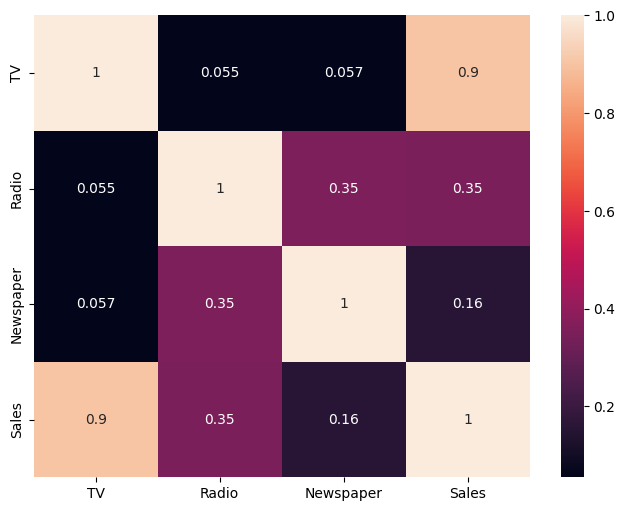

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(advertising.corr(),annot=True)

Corellation with Sales

1.TV have high

2. Radio have moderate

3. Newspapwe have low

so we drop the newspaper because of less correlation

Data clening and preproceesing


In [ ]:
df_cleaned = advertising.copy()

In [ ]:
advertising.shape

(200, 4)

In [ ]:
df_cleaned.drop_duplicates(inplace=True)

In [ ]:
advertising.shape

(200, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
cols_to_scale = ['TV', 'Radio', ]
scaler = StandardScaler()
df_cleaned[cols_to_scale] = scaler.fit_transform(df_cleaned[cols_to_scale])

In [ ]:
df_cleaned.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,69.2,22.1
1,-1.197376,1.082808,45.1,10.4
2,-1.516155,1.528463,69.3,12.0
3,0.052050,1.217855,58.5,16.5
4,0.394182,-0.841614,58.4,17.9


In [ ]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(df_cleaned, columns=['TV', 'Radio',])
y = df_cleaned['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([16.95537518, 20.36750946, 23.67877906,  9.23932462, 21.8589777 ,
       12.49890184, 21.14158798,  8.71453835, 17.26489488, 16.65891755,
        9.04850144,  8.44326393, 17.92443396,  8.17312478, 12.61199966,
       14.8739442 ,  8.09082502, 17.9679393 , 10.99191604, 20.57101437,
       20.63604288, 12.26621032, 11.0239442 , 22.2361825 ,  9.51268565,
        7.91404079, 20.86878181, 13.8814929 , 10.76286373,  8.05785124,
       15.9504224 , 10.68007267, 20.73382321, 10.22491484, 21.52687927,
       21.3167722 , 12.2771962 , 22.6941923 , 12.69753173,  6.45554633])

In [ ]:
model.score(X_test,y_test)*100

90.78797802624649

Example of data

In [ ]:

data = np.array([[150, 25]])
data_scaled = scaler.transform(data)
predicted_sales = model.predict(data_scaled)

print(f"Predicted Sales: {predicted_sales[0]}")

Predicted Sales: 15.54892686367413


Model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 2.85
Root Mean Squared Error (RMSE): 1.69
R-squared (R²): 0.9079
